<a href="https://colab.research.google.com/github/lhoegler16/Biersortenerkennung/blob/main/Trainer_Biersortenerkenner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Trainer Biersortenerkennung

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install fastai --upgrade -q

In [ ]:
from fastai.vision.all import*

In [ ]:
#download from qdrive

!cp drive/MyDrive/Biersortenerkenner/Biersortenerkenner.tar.gz ./
!mkdir /content/images
!tar -xf /content/Biersortenerkenner.tar.gz -C /content/images/

In [ ]:
path = Path('images')
failed = verify_images(get_image_files(path))
failed.map(Path.unlink);

In [ ]:
beers = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(448,ResizeMethod.Pad,pad_mode='zeros'))

beer_dataloader = beers.dataloaders(path)

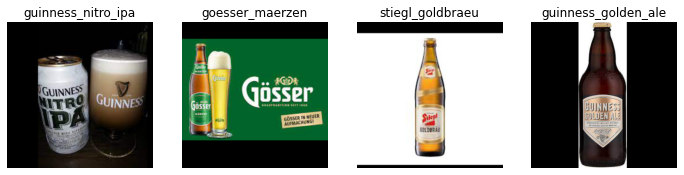

In [ ]:
beer_dataloader.show_batch(max_n = 4, nrows= 1)

In [ ]:
learner = cnn_learner(beer_dataloader,resnet34,metrics=error_rate)

In [ ]:
learner.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,0.000001,0.473906,0.089041,00:11


epoch,train_loss,valid_loss,error_rate,time
0,0.000005,0.475241,0.089041,00:14
1,0.000007,0.470270,0.075342,00:14
2,0.000008,0.468857,0.089041,00:14


#Confusion Matrix, Top Losses und Cleaner

In [ ]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix
interp.plot_top_losses(10,nrows=2)
cleaner = ImageClassifierCleaner(learner)
cleaner

In [ ]:
for idx in cleaner.delete():
  cleaner.fns[idx].unlink()

for idx,cat in cleaner.change():
  shutil.move(str(cleaner.fns[idx]), path/cat)

In [ ]:
learner.export('biersorten_classifier.pkl')

#copy learner on gdrive
!cp /content/biersorten_classifier.pkl /content/drive/MyDrive/Biersortenerkenner/biersorten_classifier.pkl

In [ ]:
#copy import learner from gdrive
!cp drive/MyDrive/Biersortenerkenner/biersorten_classifier.pkl ./

path = Path();
inference = load_learner(path/'biersorten_classifier.pkl')

In [ ]:
inference.predict('zipfer_maerzen_19.jpg')

('zipfer_maerzen',
 tensor(18),
 tensor([1.1063e-10, 9.3545e-14, 1.1275e-12, 7.7962e-12, 5.2037e-12, 3.8059e-12,
         1.6093e-10, 1.1457e-09, 6.8382e-12, 1.6371e-11, 2.8801e-09, 5.4639e-12,
         2.6451e-12, 4.2447e-11, 1.4866e-12, 6.2051e-12, 5.2494e-13, 1.2080e-10,
         1.0000e+00, 1.0114e-09, 1.0266e-11]))